In [672]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [673]:
import torch 
from torch import nn

In [674]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Generate the Data

In [675]:
X_train = np.linspace(-1, 1, 20)

In [676]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [677]:
X_test = np.linspace(-1, 1, 20)

In [678]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

In [679]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20,), (20,), (20,), (20,))

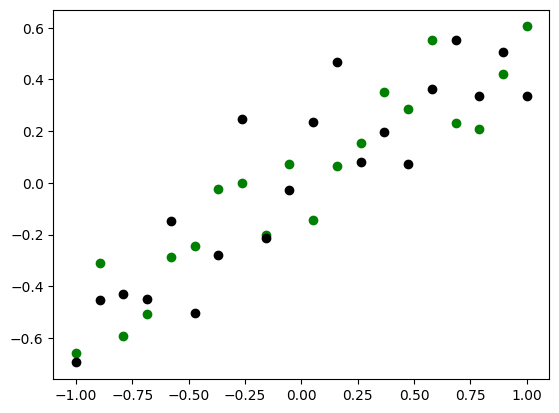

In [680]:
plt.scatter(X_train, y_train, c="g", label="Train Data")
plt.scatter(X_test, y_test, c="black", label="Test Data")
plt.show()

## Regression Model

In [681]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [682]:
class Dropout_reg(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=1, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=1)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
model = Dropout_reg().to(device)

In [683]:
model

Dropout_reg(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [684]:
total_params = sum(
	param.numel() for param in model.parameters()
)
total_params

385

In [685]:
# loss and optimizer
loss_fc = nn.MSELoss()

optimizer = torch.optim.Adam(params = model.parameters(),
                            lr = 0.01)

In [686]:
# turning data into tensors
X_train_ten = torch.from_numpy(X_train).type(torch.float)
y_train_ten = torch.from_numpy(y_train).type(torch.float)

X_test_ten = torch.from_numpy(X_test).type(torch.float)
y_test_ten = torch.from_numpy(y_train).type(torch.float)

In [687]:
X_train_ten = X_train_ten.view(-1, 1)
y_train_ten = y_train_ten.view(-1, 1)

X_test_ten = X_test_ten.view(-1, 1)
y_test_ten = y_test_ten.view(-1, 1)

In [688]:
X_train_ten.shape, y_train_ten.shape, X_test_ten.shape, y_test_ten.shape

(torch.Size([20, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

In [689]:
epochs = 500

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model.train()

  y_pred = model(X_train_ten)
  loss = loss_fc(y_pred, y_train_ten)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model.eval()
  with torch.inference_mode():

    # forward pass
    test_pred = model(X_test_ten)
    # calculate the loss/accuarcy
    test_loss = loss_fc(test_pred, y_test_ten)
  # lets print out what is happening
  if epoch % 10 == 0:
       epoch_count.append(epoch)
       train_loss_values.append(loss.detach().numpy())
       test_loss_values.append(test_loss.detach().numpy())
       print(f"Epoch: {epoch} | Loss: {loss} | Validation Loss = {test_loss.item()}")

Epoch: 0 | Loss: 0.21264731884002686 | Validation Loss = 0.08531332015991211
Epoch: 10 | Loss: 0.0182697381824255 | Validation Loss = 0.019215911626815796
Epoch: 20 | Loss: 0.01718256250023842 | Validation Loss = 0.01934407278895378
Epoch: 30 | Loss: 0.01722767762839794 | Validation Loss = 0.017888721078634262
Epoch: 40 | Loss: 0.016704648733139038 | Validation Loss = 0.017032016068696976
Epoch: 50 | Loss: 0.01596062257885933 | Validation Loss = 0.015888258814811707
Epoch: 60 | Loss: 0.015143993310630322 | Validation Loss = 0.015056973323225975
Epoch: 70 | Loss: 0.014583488926291466 | Validation Loss = 0.014561176300048828
Epoch: 80 | Loss: 0.0141622768715024 | Validation Loss = 0.014125069603323936
Epoch: 90 | Loss: 0.013796433806419373 | Validation Loss = 0.013755504973232746
Epoch: 100 | Loss: 0.0134463831782341 | Validation Loss = 0.013405846431851387
Epoch: 110 | Loss: 0.013069073669612408 | Validation Loss = 0.013042096979916096
Epoch: 120 | Loss: 0.01272514183074236 | Validation

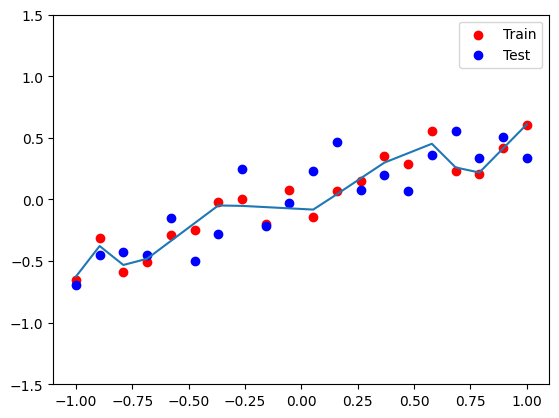

In [690]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred.detach().numpy())
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

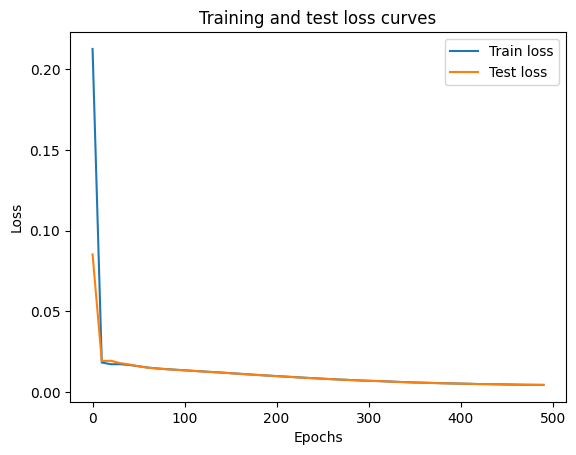

In [691]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [692]:
y_pred

tensor([[-0.6262],
        [-0.3777],
        [-0.5317],
        [-0.4810],
        [-0.3368],
        [-0.1927],
        [-0.0485],
        [-0.0520],
        [-0.0620],
        [-0.0720],
        [-0.0820],
        [ 0.0427],
        [ 0.1717],
        [ 0.2993],
        [ 0.3757],
        [ 0.4522],
        [ 0.2603],
        [ 0.2186],
        [ 0.4143],
        [ 0.6100]], grad_fn=<AddmmBackward0>)

## Dropout Model

In [715]:
class Dropout_reg_actual(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=1, out_features=64),
            nn.Dropout(p=0.09),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=64),
            nn.Dropout(p=0.09),
            nn.ReLU(),          
            nn.Linear(in_features=64, out_features=1),
            #nn.Dropout(p=0.2),
            # nn.ReLU(),          
            # nn.Linear(in_features=128, out_features=1)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
model2 = Dropout_reg_actual().to(device)

In [716]:
model2

Dropout_reg_actual(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): Dropout(p=0.09, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Dropout(p=0.09, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [717]:
total_params = sum(
	param.numel() for param in model2.parameters()
)
total_params

4353

In [718]:
# loss and optimizer
loss_fc = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [719]:
epochs = 500

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model2.train()

  y_pred2 = model2(X_train_ten)
  loss = loss_fc(y_pred2, y_train_ten)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  # scheduler.step()

  # testing
  model2.eval()
  with torch.inference_mode():

    # forward pass
    test_pred2 = model2(X_test_ten)
    # calculate the loss/accuarcy
    test_loss = loss_fc(test_pred2, y_test_ten)
      # lets print out what is happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Validation Loss = {test_loss.item()}")

Epoch: 0 | Loss: 0.10636331886053085 | Validation Loss = 0.09787606447935104
Epoch: 10 | Loss: 0.1111682876944542 | Validation Loss = 0.09787606447935104
Epoch: 20 | Loss: 0.10178474336862564 | Validation Loss = 0.09787606447935104
Epoch: 30 | Loss: 0.09624797105789185 | Validation Loss = 0.09787606447935104
Epoch: 40 | Loss: 0.08727368712425232 | Validation Loss = 0.09787606447935104
Epoch: 50 | Loss: 0.09775262326002121 | Validation Loss = 0.09787606447935104
Epoch: 60 | Loss: 0.09631500393152237 | Validation Loss = 0.09787606447935104
Epoch: 70 | Loss: 0.11986970901489258 | Validation Loss = 0.09787606447935104
Epoch: 80 | Loss: 0.11040737479925156 | Validation Loss = 0.09787606447935104
Epoch: 90 | Loss: 0.11455643177032471 | Validation Loss = 0.09787606447935104
Epoch: 100 | Loss: 0.10831250995397568 | Validation Loss = 0.09787606447935104
Epoch: 110 | Loss: 0.09327465295791626 | Validation Loss = 0.09787606447935104
Epoch: 120 | Loss: 0.10052160173654556 | Validation Loss = 0.097

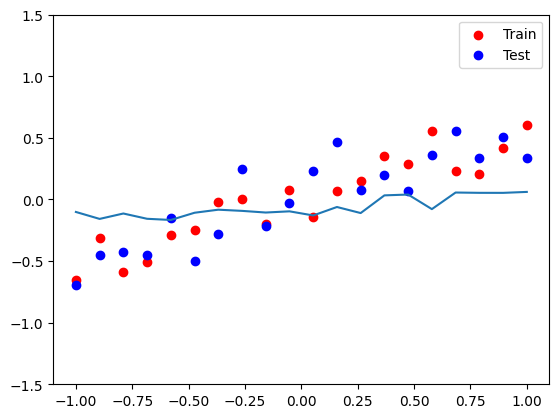

In [720]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred2.detach().numpy())
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [721]:
y_pred2

tensor([[-0.1013],
        [-0.1577],
        [-0.1139],
        [-0.1567],
        [-0.1662],
        [-0.1077],
        [-0.0829],
        [-0.0925],
        [-0.1059],
        [-0.0962],
        [-0.1297],
        [-0.0611],
        [-0.1102],
        [ 0.0333],
        [ 0.0401],
        [-0.0783],
        [ 0.0564],
        [ 0.0539],
        [ 0.0537],
        [ 0.0614]], grad_fn=<AddmmBackward0>)

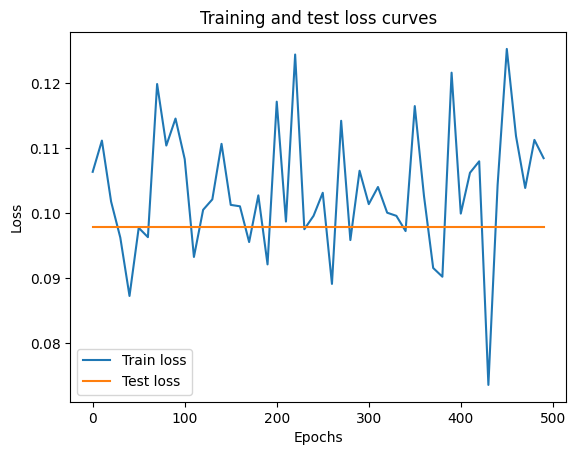

In [722]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()